In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

## Problem 1

In [2]:
cereal_dataset = pd.read_csv("cereal.csv")
cereal_dataset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [3]:
cereal_dataset["vitamins"].unique()

array([ 25,   0, 100])

In [4]:
cereal_dataset[cereal_dataset["protein"] == cereal_dataset["protein"].max()]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999
67,Special K,K,C,110,6,0,230,1.0,16.0,3,55,25,1,1.0,1.00,53.131324


## Problem 2

In [5]:
usa_mort = pd.read_csv("usa_mortality_rates.csv")

In [6]:
usa_mort

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,USA,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,30.1,29.5,28.9,28.3,27.7,27.1,...,7.3,7.2,7.1,7,6.9,6.8,6.7,6.6,6.5,NaN


In [7]:
from matplotlib.ticker import FuncFormatter

In [8]:
#get rid of nan value and the first three entries not having to do with mortality rate
years = usa_mort.columns.values[4:len(usa_mort.columns.values) - 1]
mortality_values = usa_mort.iloc[0].values[4:len(usa_mort.iloc[0].values) - 1]

In [9]:
data = {
    "Decade": np.array([int(i) - int(i) % 5 for i in years]),
    "Decade_10": np.array([int(i) - int(i) % 10 for i in years]),
    "Mortality Rates": np.array([float(i) for i in mortality_values])
}
new_tbl = pd.DataFrame(data)

In [10]:
rate_by_decade = new_tbl.groupby(["Decade"]).mean()
len(rate_by_decade.index)

12

In [11]:
sixties_data = new_tbl[new_tbl["Decade_10"] == 1960]["Mortality Rates"]
seventies_data = new_tbl[new_tbl["Decade_10"] == 1970]["Mortality Rates"]
eighties_data = new_tbl[new_tbl["Decade_10"] == 1980]["Mortality Rates"]
nineties_data = new_tbl[new_tbl["Decade_10"] == 1990]["Mortality Rates"]
two_thousands_data = new_tbl[new_tbl["Decade_10"] == 2000]["Mortality Rates"]
two_thousand_tens_data = new_tbl[new_tbl["Decade_10"] == 2010]["Mortality Rates"]

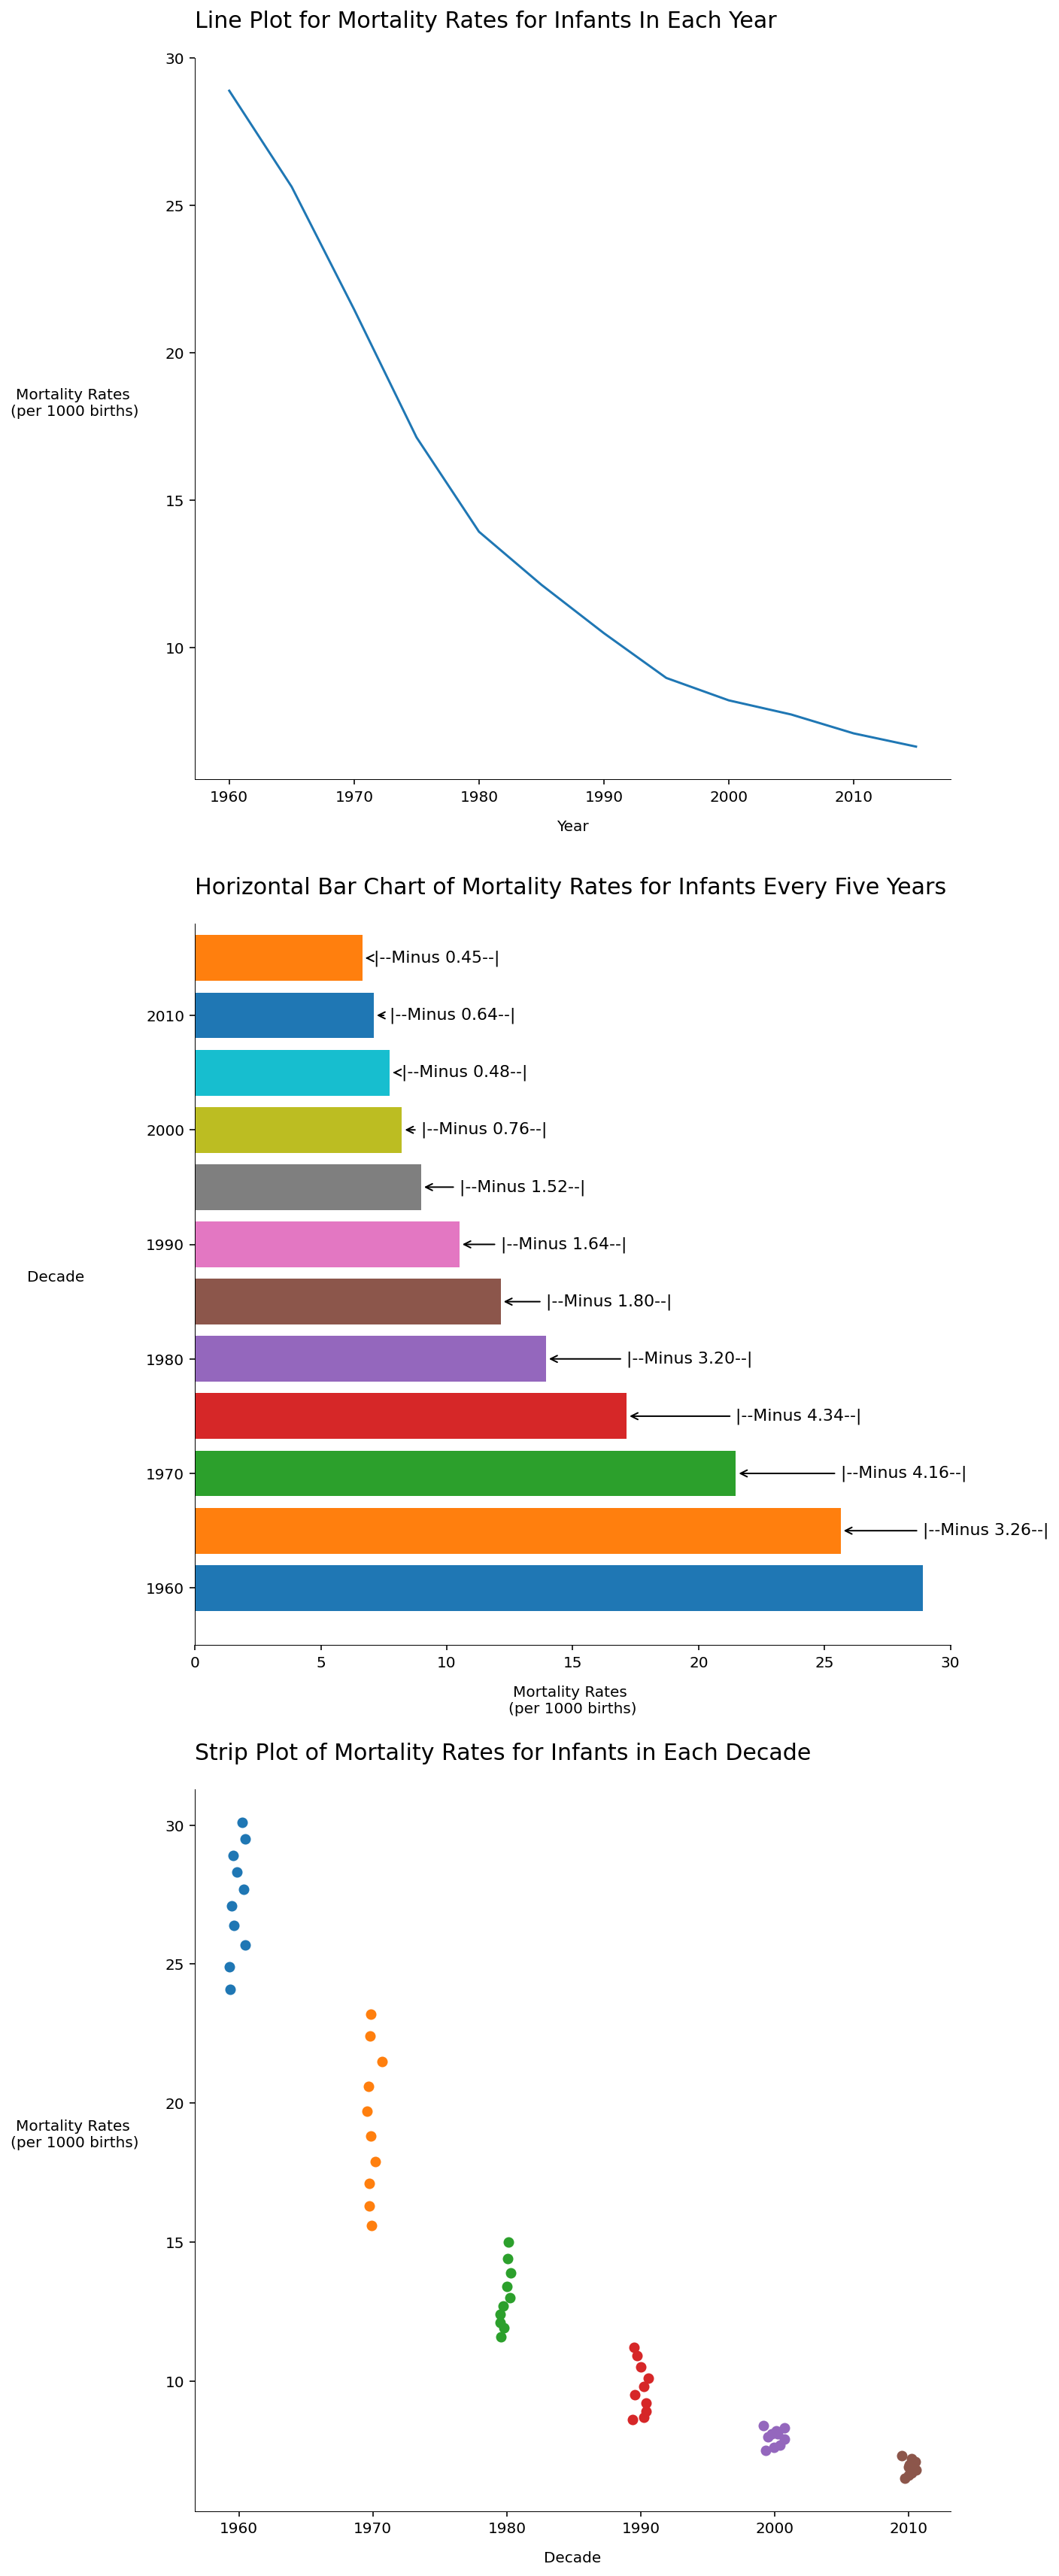

In [12]:
#Line Plot
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (9, 30)) 

axes = axes.flatten()

axes[0].set_title("Line Plot for Mortality Rates for Infants In Each Year", 
                  loc = "left", pad = 20, fontsize = 15)
axes[0].set_xlabel("Year", labelpad = 10)
axes[0].set_ylabel("Mortality Rates \n(per 1000 births)", rotation = 0, labelpad = 60)
axes[0].plot(np.array(rate_by_decade.index), rate_by_decade["Mortality Rates"])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_linewidth(.5)
axes[0].spines['bottom'].set_linewidth(.5)


#Bar Plot
axes[1].set_title("Horizontal Bar Chart of Mortality Rates for Infants Every Five Years",
                 loc = "left", pad = 20, fontsize = 15)
axes[1].set_ylabel("Decade", rotation = 0, labelpad = 60)
axes[1].set_ylim(1955, 2018)
axes[1].set_xlabel("Mortality Rates \n(per 1000 births)", labelpad = 10)
axes[1].set_xlim(0, 30)
for i in np.arange(len(rate_by_decade.index)): 
    axes[1].barh(rate_by_decade.index[i], rate_by_decade["Mortality Rates"].iloc[i], height = 4)
    if i > 0: 
        rounded_numb = rate_by_decade["Mortality Rates"].iloc[i - 1] - rate_by_decade["Mortality Rates"].iloc[i]
        axes[1].annotate("|--Minus " + f"{rounded_numb:.2f}" + "--|", 
                         xy = (rate_by_decade["Mortality Rates"].iloc[i], rate_by_decade.index[i]), 
                        xytext = (rate_by_decade["Mortality Rates"].iloc[i - 1], rate_by_decade.index[i]), 
                        arrowprops = dict(color = 'black', arrowstyle = '->'), fontsize = 11, horizontalalignment = 'left',
                        verticalalignment = 'center')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_linewidth(.5)
axes[1].spines['bottom'].set_linewidth(.5)


#Strip Plot
mu = 0
sigma = 0.5
sixties_noise = np.random.normal(mu, sigma, len(sixties_data))
seventies_noise = np.random.normal(mu, sigma, len(seventies_data))
eighties_noise = np.random.normal(mu, sigma, len(eighties_data))
nineties_noise = np.random.normal(mu, sigma, len(nineties_data))
two_thousands_noise = np.random.normal(mu, sigma, len(two_thousands_data))
two_thousand_tens_noise = np.random.normal(mu, sigma, len(two_thousand_tens_data))

axes[2].set_title("Strip Plot of Mortality Rates for Infants in Each Decade",
                 loc = "left", pad = 20, fontsize = 15)
axes[2].set_xlabel("Decade", labelpad = 10)
axes[2].set_ylabel("Mortality Rates \n(per 1000 births)", rotation = 0, labelpad = 60)

#To look at the distribution/spread of data (where they mostly lie per year)
axes[2].scatter([1960] + sixties_noise, sixties_data)
axes[2].scatter([1970] + seventies_noise, seventies_data)
axes[2].scatter([1980] + eighties_noise, eighties_data)
axes[2].scatter([1990] + nineties_noise, nineties_data)
axes[2].scatter([2000] + two_thousands_noise, two_thousands_data)
axes[2].scatter([2010] + two_thousand_tens_noise, two_thousand_tens_data)
axes[2].set_xticklabels([0, 1960, 1970, 1980, 1990, 2000, 2010])
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].spines['left'].set_linewidth(.5)
axes[2].spines['bottom'].set_linewidth(.5)

plt.show()

I think that the line plot showing the relationship between years and mortality rate shows the relationship between the two variables the best as it shows how the general mortality rate of infants per 1000 births goes down as time goes on. It gives a nice visiual shape of how mortality rate has been decreasing, showing that the even the rate of decrease of the mortality rate has been increasing every five years. The strip plot for example shows distribution of data which shows different information than a general overall trend through time. For this type of data, looking at a trend through time using a line plot is more beneficial in showing how mortality rate has been decreasing since 1960. 

## Problem 3

In [13]:
feedback = pd.DataFrame({
    "Survey Category": ["Peers", "Culture", "Work Environment", "Leadership", "Career Development", 
                        "Rewards & Recognition", "Perf management"], 
    "2014": [85, 80, 76, 59, 49, 41, 33], 
    "2015": [91, 96, 75, 62, 33, 45, 42]
})

In [14]:
feedback

,Survey Category,2014,2015
0,Peers,85,91
1,Culture,80,96
2,Work Environment,76,75
3,Leadership,59,62
4,Career Development,49,33
5,Rewards & Recognition,41,45
6,Perf management,33,42


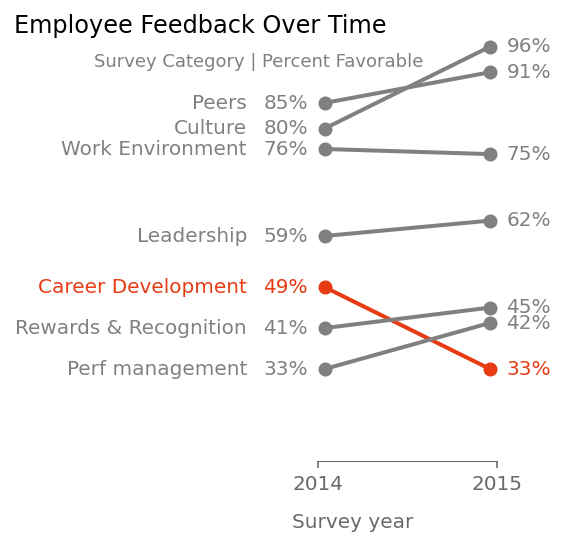

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (1.6, 4))

margins = 0.04
#set the limits for the x and y axis
ax.set_xlim(0 - margins, 1 + margins)
ax.set_ylim(15, 100)

#Text before any plotting
ax.text(0 - 0.75, 100, "Employee Feedback Over Time", color = "black", 
       horizontalalignment = "center", verticalalignment = "center", fontsize = 12)
ax.text(0 - 0.38, 93, "Survey Category | ", color = "grey", horizontalalignment = "right", 
        verticalalignment = "center", fontsize = 9)
ax.text(0 - 0.38, 93, "Percent Favorable", color = "grey", horizontalalignment = "left", 
       verticalalignment = "center", fontsize = 9)

#get all the information from each row in the table above
for i in np.arange(7): 
    tbl_row = feedback.iloc[i]
    cat = tbl_row["Survey Category"]
    first_val = tbl_row["2014"]
    second_val = tbl_row['2015']
    if cat == "Career Development": 
        color = "#E73B14"
    else: 
        color = "gray"
    #line from 2014 to 2015 percent favorable
    ax.plot([0, 1], [first_val, second_val], "o-", lw = 2, c = color)
    
    #add appropriate text
    ax.text(0 - .1, first_val, str(first_val) + "%", color = color, 
           horizontalalignment = "right", verticalalignment = "center")
    ax.text(0 - 0.47, first_val, cat, color = color, 
            horizontalalignment = "right", verticalalignment = "center")
    ax.text(1 + 0.1, second_val, str(second_val) + "%", color = color, 
            horizontalalignment = "left", verticalalignment = "center")

ax.text(0 - 0.2, 2, "Survey year", color = "dimgrey")
ax.set_xticks([0 - margins, 1 + margins])
ax.set_xticklabels([2014, 2015])
ax.tick_params(axis = 'x', colors = "dimgrey")
ax.set_yticks([])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_linewidth(.5)
ax.spines['bottom'].set_color("dimgrey")

fig.patch.set_facecolor("white")

plt.show()